In [1045]:
# !pip install pyarrow

In [1046]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [1047]:
df = pd.read_parquet("../data/dataset.parquet")
df

,date,open,high,low,close,adj close,volume,close_percent_change,dividends_event_value,dividends_event_name,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
0,2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998869,154232000,-0.005055,0.0000,None,...,NaN,NaN,NaN,NaN,NaN,2,6,8,2014,32
1,2014-08-07,23.732500,23.987499,23.525000,23.620001,20.996649,186844000,0.002752,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,3,7,8,2014,32
2,2014-08-08,23.565001,23.705000,23.320000,23.684999,21.054420,167460000,0.013194,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,4,8,8,2014,32
3,2014-08-11,23.817499,24.020000,23.709999,23.997499,21.332216,146340000,-0.000208,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,0,11,8,2014,33
4,2014-08-12,24.010000,24.219999,23.902500,23.992500,21.327774,135180000,0.013233,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,1,12,8,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,0.014991,0.2500,dividends,...,48983000.0,45057100.0,77305800.0,78569700.0,163224100.0,1,30,7,2024,31
2512,2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,-0.016751,0.2500,dividends,...,50759500.0,48983000.0,45057100.0,77305800.0,78569700.0,2,31,7,2024,31
2513,2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,0.006869,0.2500,dividends,...,72044800.0,50759500.0,48983000.0,45057100.0,77305800.0,3,1,8,2024,31
2514,2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600,-0.048167,0.2500,dividends,...,52393600.0,72044800.0,50759500.0,48983000.0,45057100.0,4,2,8,2024,31


In [1048]:
# target = "target_close"
target = "close_percent_change"

x = df.drop(columns=[target]).set_index("date")
y = df[["date", target]].set_index("date")
y

,close_percent_change
date,
2014-08-06,-0.005055
2014-08-07,0.002752
2014-08-08,0.013194
2014-08-11,-0.000208
2014-08-12,0.013233
...,...
2024-07-30,0.014991
2024-07-31,-0.016751
2024-08-01,0.006869


In [1049]:
x

,open,high,low,close,adj close,volume,dividends_event_value,dividends_event_name,dividends_event_sentiment,dividends_event_decay,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998869,154232000,0.0000,None,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2,6,8,2014,32
2014-08-07,23.732500,23.987499,23.525000,23.620001,20.996649,186844000,0.1175,dividends,1.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,3,7,8,2014,32
2014-08-08,23.565001,23.705000,23.320000,23.684999,21.054420,167460000,0.1175,dividends,1.0,0.980000,...,NaN,NaN,NaN,NaN,NaN,4,8,8,2014,32
2014-08-11,23.817499,24.020000,23.709999,23.997499,21.332216,146340000,0.1175,dividends,1.0,0.960400,...,NaN,NaN,NaN,NaN,NaN,0,11,8,2014,33
2014-08-12,24.010000,24.219999,23.902500,23.992500,21.327774,135180000,0.1175,dividends,1.0,0.941192,...,NaN,NaN,NaN,NaN,NaN,1,12,8,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,0.2500,dividends,1.0,0.335899,...,48983000.0,45057100.0,77305800.0,78569700.0,163224100.0,1,30,7,2024,31
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,0.2500,dividends,1.0,0.329181,...,50759500.0,48983000.0,45057100.0,77305800.0,78569700.0,2,31,7,2024,31
2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,0.2500,dividends,1.0,0.322597,...,72044800.0,50759500.0,48983000.0,45057100.0,77305800.0,3,1,8,2024,31


In [1050]:
table_info = pd.DataFrame()

# Print columns that are not int, float, bool or category
for col in x.columns:
    dtype = x[col].dtype
    if dtype not in ["int", "float64", "bool", "category"]:
        table_info = pd.concat([table_info, pd.DataFrame({"Column Name": [col], "Data Type": [x[col].dtype]})])

table_info

,Column Name,Data Type
0,volume,int64
0,dividends_event_name,object
0,splits_event_name,object


In [1051]:
# Convert columns to float if they are not int, float, bool or category. Handle Cannot cast DatetimeArray to dtype float64
for col in x.columns:
    dtype = x[col].dtype
    if dtype not in ["int", "float64", "bool", "category"]:
        try:
            x[col] = x[col].astype("float")
        except:
            # drop datetime columns
            x = x.drop(columns=[col])

            print(f"Dropped Column: {col}")

Dropped Column: dividends_event_name
Dropped Column: splits_event_name


In [1052]:
# # Normalizing the features between 0 and 1
# y_scaler = MinMaxScaler()
# y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# x_scaler = MinMaxScaler()
# x = x_scaler.fit_transform(x)

# y

In [1053]:
#    All Features   | Target
# +-----------------+---------+
# | x_train         | y_train | <- 85% of the data which is used for training
# |                 |         |
# +-----------------+---------+
# | x_test          | y_test  | <- 15% of the data which is used for testing
# +-----------------+---------+



# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
x_train

,open,high,low,close,adj close,volume,dividends_event_value,dividends_event_sentiment,dividends_event_decay,splits_event_value,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,
2022-04-27,155.910004,159.789993,155.380005,156.570007,154.591293,88063200.0,0.2200,1.0,0.322597,4.0,...,77251200.0,82465400.0,89418100.0,84914300.0,86213900.0,2,27,4,2022,17
2020-03-23,57.020000,57.125000,53.152500,56.092499,54.632900,336752800.0,0.1925,1.0,0.545484,0.0,...,135480400.0,100805600.0,144114400.0,146266000.0,93121200.0,0,23,3,2020,13
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.365372,66435100.0,0.2300,1.0,0.342754,4.0,...,93604600.0,80379300.0,97943200.0,164762400.0,109180200.0,1,24,1,2023,4
2015-04-30,32.160000,32.160000,31.145000,31.287500,28.043394,332781600.0,0.1175,1.0,0.309822,0.0,...,248034000.0,155559200.0,174826400.0,168984800.0,280598800.0,3,30,4,2015,18
2020-06-17,88.787498,88.849998,87.772499,87.897499,85.842026,114406400.0,0.2050,1.0,0.579568,0.0,...,167976400.0,204216800.0,252087200.0,303602000.0,287531200.0,2,17,6,2020,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-13,35.477501,35.595001,35.262501,35.262501,32.872681,71291600.0,0.1425,1.0,0.411100,0.0,...,129510400.0,92844000.0,88200800.0,130391600.0,102389200.0,3,13,4,2017,15
2022-12-13,149.500000,149.970001,144.240005,145.470001,144.281372,93886200.0,0.2300,1.0,0.591395,4.0,...,93339400.0,96029900.0,86652500.0,101696800.0,107689800.0,1,13,12,2022,50
2015-07-14,31.510000,31.592501,31.260000,31.402500,28.264046,127072400.0,0.1300,1.0,0.394820,0.0,...,178103600.0,183083600.0,150618000.0,129740400.0,188217200.0,1,14,7,2015,29


In [1054]:
y_test

,close_percent_change
date,
2023-01-03,0.010314
2018-08-17,-0.009744
2023-05-25,0.014105
2022-08-15,-0.000924
2016-08-17,-0.001282
...,...
2023-09-26,-0.008897
2016-10-14,-0.000680
2021-09-16,-0.018348


In [1055]:
# model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=1, colsample_bytree=0.8)
model = xgb.XGBRegressor(n_estimators=150, max_depth=7, eta=0.1, subsample=1, colsample_bytree=.5)
model.fit(x_train, y_train)
model.save_model("../model/xgboost_model.json")

In [1056]:
predicted = model.predict(x_test)
predicted

array([ 4.03736625e-03,  3.21741542e-03,  2.89314101e-03,  6.76339399e-03,
        3.84731009e-03, -1.86125305e-03, -3.54310684e-03, -3.29352403e-03,
        2.42395373e-03,  1.53350960e-02,  8.83151405e-03,  2.39224453e-03,
       -5.50887838e-04, -2.27199076e-03,  7.37046183e-04,  1.88761801e-02,
        1.97151885e-03,  1.25671178e-03, -3.92705435e-03,  6.16150815e-03,
        4.05573240e-03,  5.32873673e-03,  3.00912024e-03, -1.22413784e-03,
        1.18119013e-03,  2.87889037e-03, -9.79684573e-03, -4.93751199e-04,
        4.81971353e-03,  7.12356181e-04,  3.72290262e-03, -1.98019785e-03,
       -2.67555425e-03,  3.13052209e-03, -9.77567304e-03,  4.80056321e-03,
       -8.78852792e-03, -4.72842902e-03,  3.56649235e-03,  5.26517024e-03,
        6.68736454e-03, -7.37246592e-04,  1.18867569e-02,  2.73843500e-04,
        6.16187789e-03,  2.21429039e-02, -1.62098859e-03,  3.91738256e-03,
       -8.34260415e-03,  5.28870989e-03,  6.64026150e-03,  2.75055482e-03,
       -1.73268700e-03,  

In [1057]:
# Add predicted values to the dataframe
y_test["predicted"] = predicted
y_test

,close_percent_change,predicted
date,,
2023-01-03,0.010314,0.004037
2018-08-17,-0.009744,0.003217
2023-05-25,0.014105,0.002893
2022-08-15,-0.000924,0.006763
2016-08-17,-0.001282,0.003847
...,...,...
2023-09-26,-0.008897,-0.000432
2016-10-14,-0.000680,0.001327
2021-09-16,-0.018348,0.002364


In [1058]:
# Get the root mean squared error (RMSE)
mse = np.mean((y_test["predicted"] - y_test[target]) ** 2)
rmse = np.sqrt(mse)
rmse

0.017964681037775883

In [1059]:
# Get the mean absolute error (MAE)
mae = np.mean(np.abs(y_test["predicted"] - y_test[target]))
mae

0.013204934901696013

In [1060]:
# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test[target] - y_test["predicted"]) / y_test[target])) * 100
mape

212.41812769804352

In [1061]:
# sort the values by date
y_test = y_test.sort_index()

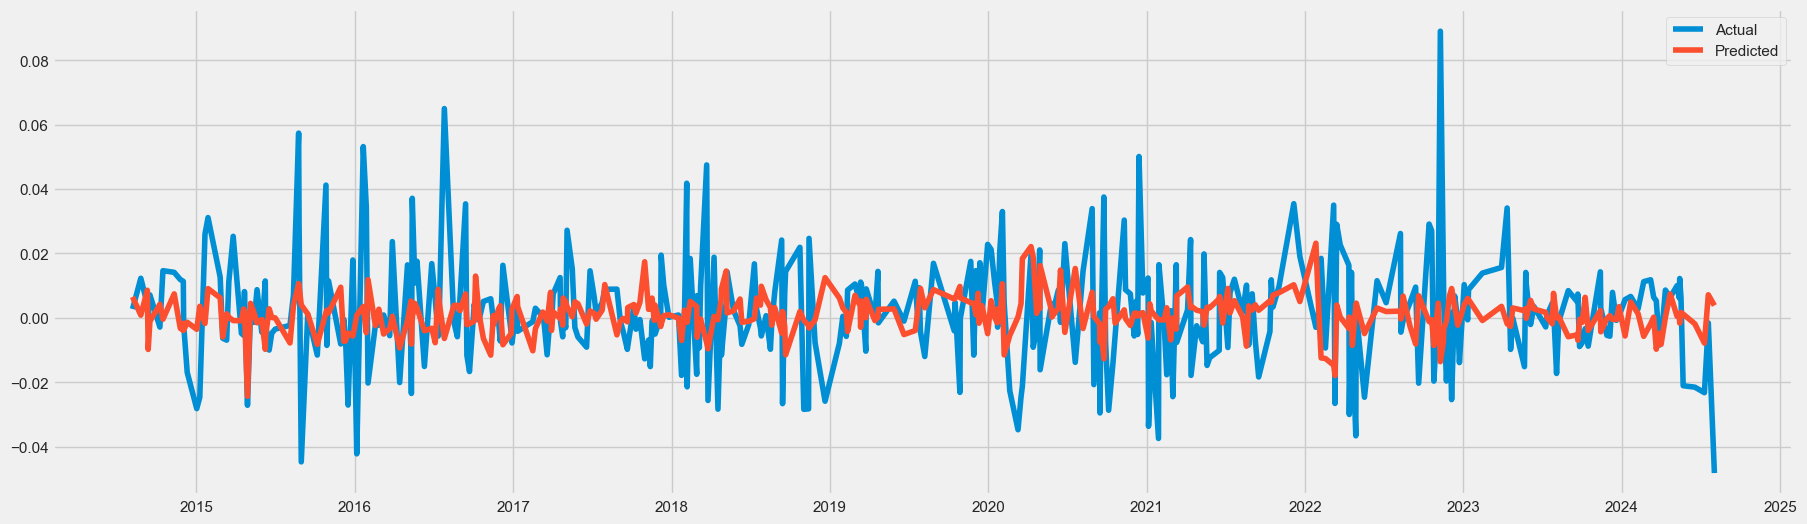

In [1062]:
# Plot the predicted vs actual values
plt.figure(figsize=(20, 6))
plt.plot(y_test[target], label="Actual")
plt.plot(y_test["predicted"], label="Predicted")
plt.legend()
plt.show()

<Axes: xlabel='date', ylabel='value'>

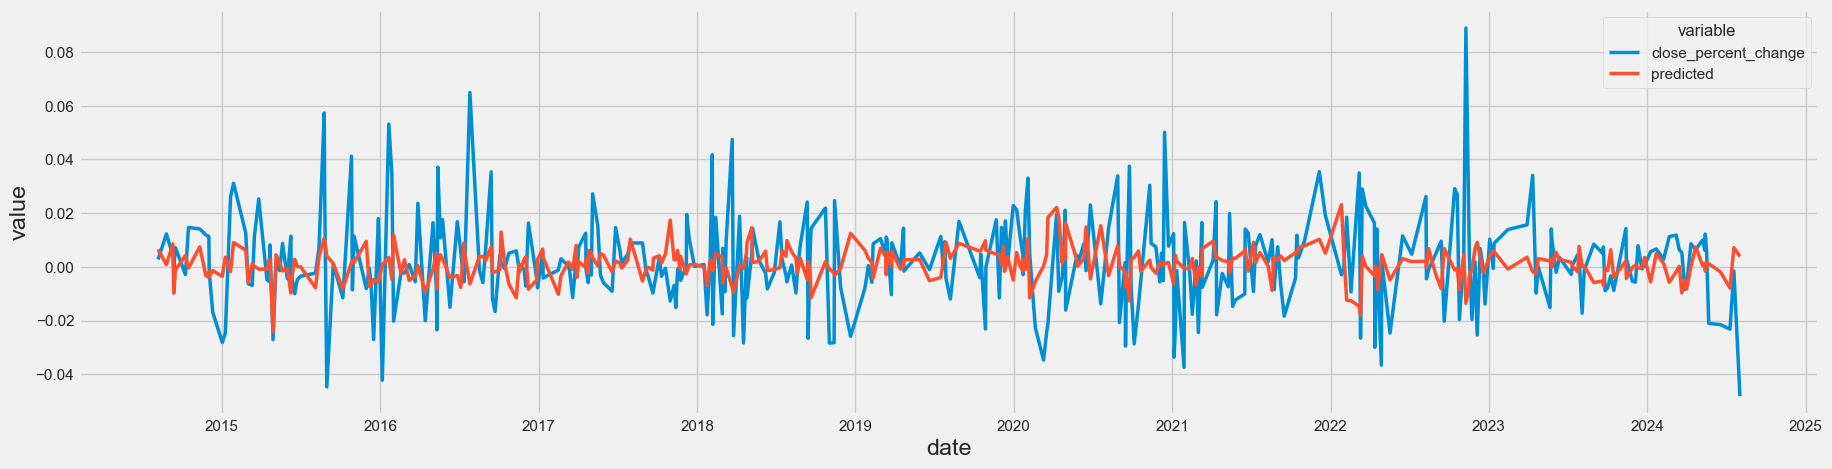

In [1073]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(
    y_test.reset_index().melt(id_vars=["date"], value_vars=["close_percent_change", "predicted"]),
    y="value",
    x="date",
    hue="variable",
    linewidth=2.5,
    ax=ax,
)

In [ ]:
df_importance = pd.DataFrame()

importance_types = ["weight", "gain", "cover", "total_gain", "total_cover"]
for importance_type in importance_types:
    importance = model.get_booster().get_score(importance_type=importance_type)

    df_i = pd.DataFrame(importance.items(), columns=["feature", importance_type])

    if df_importance.empty:
        df_importance = df_i
    else:
        df_importance = pd.merge(df_importance, df_i, on="feature", how="outer")
df_importance


,feature,weight,gain,cover,total_gain,total_cover
0,adj close,49.0,0.000135,30.857143,0.006595,1512.0
1,close,74.0,0.000305,75.486488,0.022550,5586.0
2,day_of_month,65.0,0.000521,194.353851,0.033858,12633.0
3,day_of_week,33.0,0.000480,205.424240,0.015853,6779.0
4,dividends_event_decay,161.0,0.000303,118.080742,0.048715,19011.0
...,...,...,...,...,...,...
246,volume_lag_7,105.0,0.000386,432.876190,0.040580,45452.0
247,volume_lag_8,104.0,0.000273,644.855774,0.028406,67065.0
248,volume_lag_9,88.0,0.000407,366.170441,0.035843,32223.0
249,week_of_year,50.0,0.000454,450.019989,0.022679,22501.0


In [ ]:
def normalize_column(data: pd.DataFrame, column: str | list) -> pd.DataFrame:
    if isinstance(column, str):
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    elif isinstance(column, list):
        for col in column:
            data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

In [ ]:
df_importance = normalize_column(df_importance, ["weight", "gain", "cover", "total_gain", "total_cover"])
df_importance_melted = df_importance.sort_values(by="weight", ascending=True).melt(id_vars=["feature"], value_vars=importance_types)
# df_importance

In [ ]:
# df_importance.sort_values(by="weight", ascending=True).melt(id_vars=["feature"], value_vars=importance_types)

<Axes: xlabel='value', ylabel='feature'>

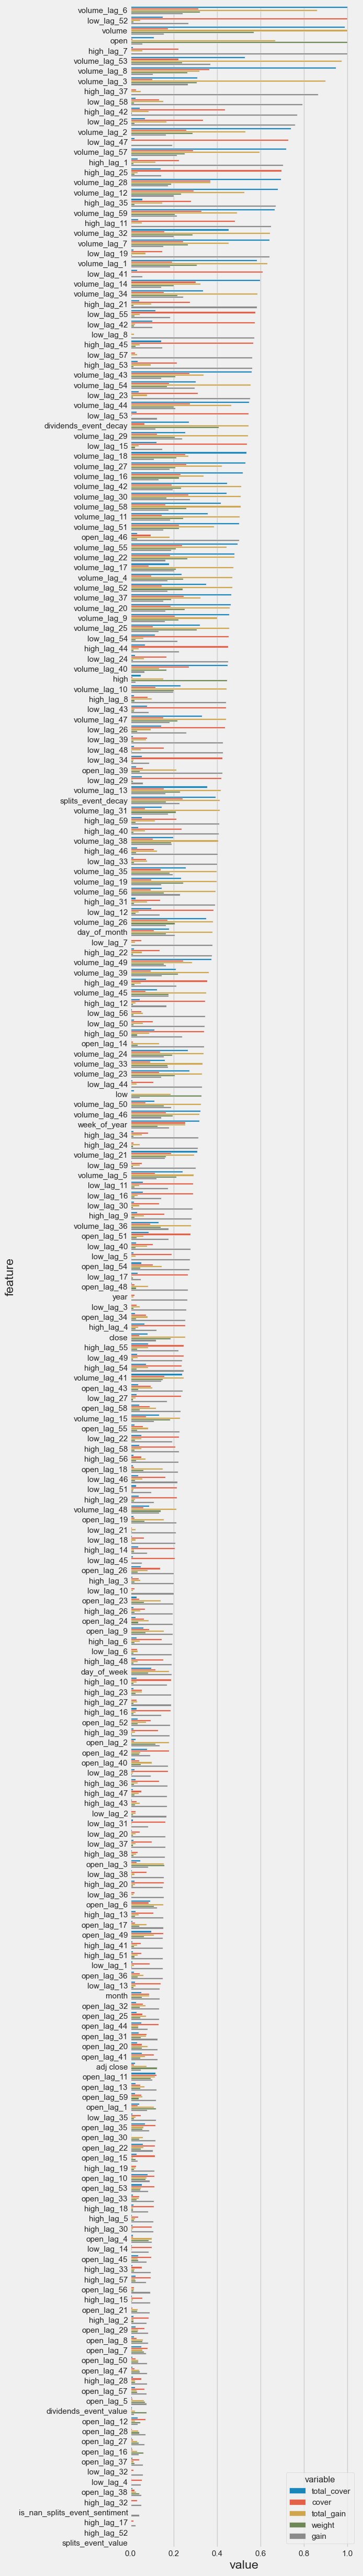

In [ ]:
fig, ax = plt.subplots(figsize=(5, 60))
sns.barplot(
    df_importance
    .melt(id_vars=["feature"], value_vars=importance_types).sort_values(by="value", ascending=False),
    y="feature",
    x="value",
    hue="variable",
    ax=ax,
)

<Axes: xlabel='value', ylabel='feature'>

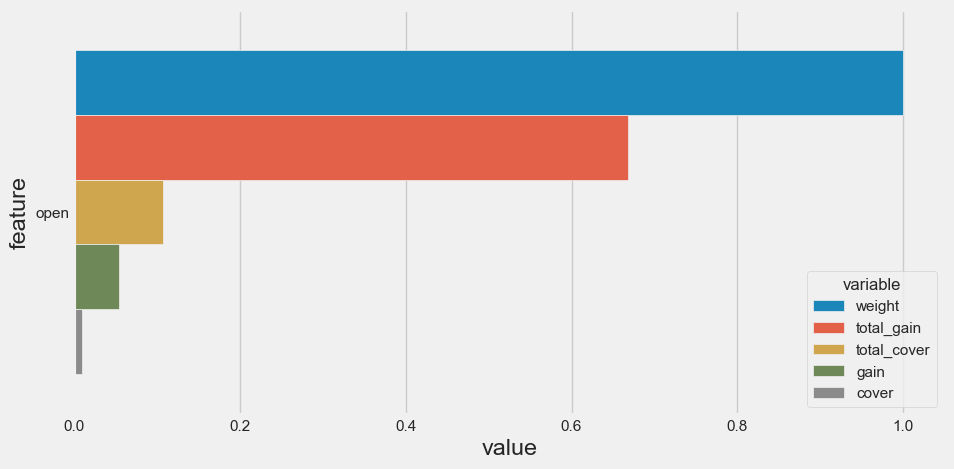

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    df_importance[df_importance["feature"] == "open"]
    .melt(id_vars=["feature"], value_vars=importance_types).sort_values(by="value", ascending=False),
    y="feature",
    x="value",
    hue="variable",
    ax=ax,
)